In [1]:
import pandas as pd
from sklearn import datasets
df=datasets.fetch_california_housing()

In [2]:
#Lets get our input and output data
x=pd.DataFrame(df.data,columns=df.feature_names)


In [3]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y=pd.DataFrame(df.target,columns=["target"])

In [5]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
x.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
y.isnull().sum()

target    0
dtype: int64

In [9]:
#lets concatenate the dataframes
df=pd.concat([x,y],axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
sns.pairplot(df)

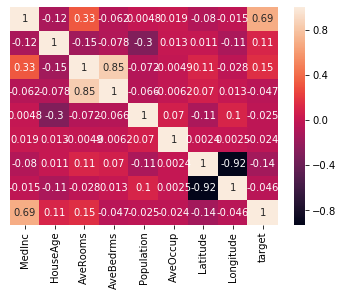

In [12]:
import seaborn as sns
sns.heatmap(df.corr(),yticklabels=False,annot=True)

In [15]:
df.shape

(19794, 9)

In [17]:
#Lets remove outliers
from scipy.stats import zscore
zs=zscore(df)
df=df.loc[(abs(zs)<3).all(axis=1)]
df.shape

(17943, 9)

In [18]:
x=df.drop(columns=["target"])
y=df[["target"]]

In [19]:
#lets check the skewness
x.skew()

MedInc        0.617089
HouseAge      0.010434
AveRooms      0.112081
AveBedrms     0.450956
Population    0.846848
AveOccup      0.527768
Latitude      0.436307
Longitude    -0.287880
dtype: float64

In [22]:
#Lets treat the skewness
import numpy as np
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.logp1(x[index])

In [23]:
x.skew()

MedInc        0.140247
HouseAge      0.010434
AveRooms      0.112081
AveBedrms     0.450956
Population    0.113750
AveOccup      0.188115
Latitude      0.436307
Longitude    -0.287880
dtype: float64

In [24]:
#Lets bring all features to common scale as we are using linear regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
from timeit import default_timer as timer
start_ho_val = timer()
print("r2_score is: {}".format(r2_score(y_test,y_pred)))
end_ho_val = timer()
print("Time taken for hold out validation :{}".format(end_ho_val-start_ho_val))

r2_score is: 0.6214402712545697
Time taken for hold out validation :0.003991999999925611
